importing dependencies

In [19]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor
from sklearn import metrics
import matplotlib.pyplot as plt
import seaborn as sklearn
from sklearn import datasets
from sklearn.metrics import accuracy_score

Importing the boston house price dataset

In [20]:
house_df = pd.read_csv('/content/drive/MyDrive/BostonHousing.csv')

In [21]:
house_df.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,price
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [22]:
# checking the number of rows and Columns in the data frame
house_df.shape

(506, 14)

In [23]:
#checking null value
house_df.isnull().sum()

crim       0
zn         0
indus      0
chas       0
nox        0
rm         0
age        0
dis        0
rad        0
tax        0
ptratio    0
b          0
lstat      0
price      0
dtype: int64

In [24]:
#Statistical measures of the dataset
house_df.describe()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,price
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


Normalization/Standraization

In [25]:
from sklearn.preprocessing import MinMaxScaler
scaling=MinMaxScaler()
norm_df=pd.DataFrame(scaling.fit_transform(house_df),columns=house_df.columns)

In [26]:
norm_df.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,price
0,0.000000,0.18,0.067815,0.0,0.314815,0.577505,0.641607,0.269203,0.000000,0.208015,0.287234,1.000000,0.089680,0.422222
1,0.000236,0.00,0.242302,0.0,0.172840,0.547998,0.782698,0.348962,0.043478,0.104962,0.553191,1.000000,0.204470,0.368889
2,0.000236,0.00,0.242302,0.0,0.172840,0.694386,0.599382,0.348962,0.043478,0.104962,0.553191,0.989737,0.063466,0.660000
3,0.000293,0.00,0.063050,0.0,0.150206,0.658555,0.441813,0.448545,0.086957,0.066794,0.648936,0.994276,0.033389,0.631111
4,0.000705,0.00,0.063050,0.0,0.150206,0.687105,0.528321,0.448545,0.086957,0.066794,0.648936,1.000000,0.099338,0.693333


In [27]:
#understanding the correlation between various feature of the dataset
correlation=norm_df.corr()

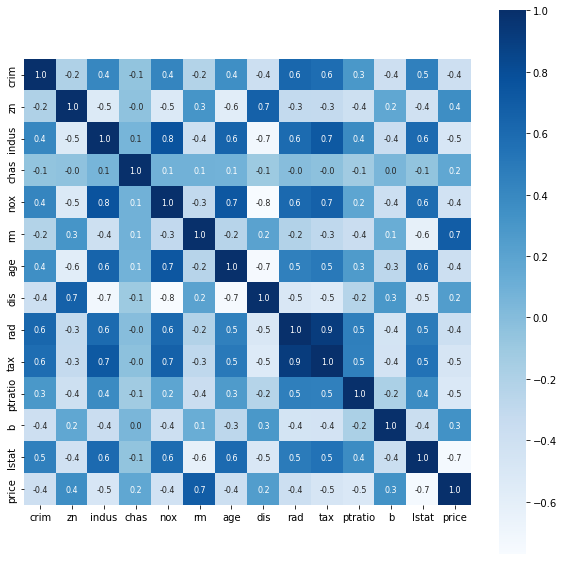

In [28]:

#constructing the Heatmap to understand correlation
plt.figure(figsize=(10,10))
sns.heatmap(correlation,cbar=True,square=True,fmt='.1f',annot=True,annot_kws={'size':8},cmap='Blues')

Splitting the Dataset

In [29]:
X=norm_df.iloc[:,:13]
Y=norm_df.iloc[:,13]

In [30]:
X

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat
0,0.000000,0.18,0.067815,0.0,0.314815,0.577505,0.641607,0.269203,0.000000,0.208015,0.287234,1.000000,0.089680
1,0.000236,0.00,0.242302,0.0,0.172840,0.547998,0.782698,0.348962,0.043478,0.104962,0.553191,1.000000,0.204470
2,0.000236,0.00,0.242302,0.0,0.172840,0.694386,0.599382,0.348962,0.043478,0.104962,0.553191,0.989737,0.063466
3,0.000293,0.00,0.063050,0.0,0.150206,0.658555,0.441813,0.448545,0.086957,0.066794,0.648936,0.994276,0.033389
4,0.000705,0.00,0.063050,0.0,0.150206,0.687105,0.528321,0.448545,0.086957,0.066794,0.648936,1.000000,0.099338
...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.000633,0.00,0.420455,0.0,0.386831,0.580954,0.681771,0.122671,0.000000,0.164122,0.893617,0.987619,0.219095
502,0.000438,0.00,0.420455,0.0,0.386831,0.490324,0.760041,0.105293,0.000000,0.164122,0.893617,1.000000,0.202815
503,0.000612,0.00,0.420455,0.0,0.386831,0.654340,0.907312,0.094381,0.000000,0.164122,0.893617,1.000000,0.107892
504,0.001161,0.00,0.420455,0.0,0.386831,0.619467,0.889804,0.114514,0.000000,0.164122,0.893617,0.991301,0.131071


In [31]:
Y

0      0.422222
1      0.368889
2      0.660000
3      0.631111
4      0.693333
         ...   
501    0.386667
502    0.346667
503    0.420000
504    0.377778
505    0.153333
Name: price, Length: 506, dtype: float64

In [32]:
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.2,random_state=3)

Model Training

In [33]:
#load the model
model=XGBRegressor()

In [34]:
#training the model with x_train
model.fit(x_train,y_train)

[05:57:46] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor()

Evalution

predicting the training data

In [35]:
#accuracy for prediction of traning data
train_data_prediction=model.predict(x_train)


In [36]:
print(train_data_prediction)

[0.18664691 0.3452937  0.6752989  0.17492515 0.33556372 0.36323267
 0.37467176 0.99239635 0.40053433 0.15974769 0.23060697 0.41860688
 0.4028409  0.31386182 0.5651653  0.5635753  0.26678038 0.4468847
 0.2484512  0.10895485 0.20877883 0.3569798  0.3080185  0.28669342
 0.29665422 0.6624593  0.19381657 0.37145233 0.42834514 0.44490984
 0.21960005 0.48945403 0.3505044  0.24399456 0.37070477 0.08070761
 0.2907297  0.46986595 0.19192404 0.4234507  0.47267276 0.36135077
 0.23493212 0.93895686 0.20801827 0.49191916 0.26030532 0.30160248
 0.26824328 0.40642843 0.34851354 0.20191675 0.84442294 0.7502978
 0.41087177 0.3262929  0.9458183  0.59492254 0.24134615 0.23410201
 0.3501599  0.4407839  0.35809207 0.304137   0.42518097 0.20163286
 0.3380679  0.42914045 0.63466626 0.79739594 0.6419363  0.4104883
 0.24383792 0.39117488 0.6598397  0.39428985 0.12553266 0.36077732
 0.60658824 0.21043864 0.08308199 0.4381155  0.35764366 0.2829551
 0.90970814 0.40747482 0.20707336 0.3382424  0.29006875 0.908136
 

In [40]:
#R squared error
score_1=metrics.r2_score(y_train,train_data_prediction)


#mean absolute error
score_2=metrics.mean_absolute_error(y_train,train_data_prediction)

print("R squared error : ",score_1)
print("mean absolute error : ",score_2)

R squared error :  0.9722361646543312
mean absolute error :  0.02628306367281902


Visualising the actual prices and predicted prices 

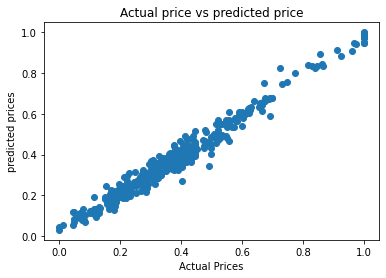

In [41]:
plt.scatter(y_train,train_data_prediction)
plt.xlabel("Actual Prices")
plt.ylabel("predicted prices")
plt.title("Actual price vs predicted price")
plt.show()

Prediction on test data

In [43]:
#accuracy for prediction on test data
test_data_prediction=model.predict(x_test)

print(test_data_prediction)

[0.9587098  0.28863713 0.257678   0.59299356 0.39593688 0.41325152
 0.21866712 0.07314426 0.37166792 0.26637346 0.263886   0.6772356
 0.69785917 0.5129141  0.06756562 0.13444278 0.37633526 0.2149503
 0.2208024  0.4118359  0.47494906 0.9276191  0.40974528 0.42124832
 0.13845432 0.456336   0.30973563 0.38461134 0.30752903 0.36983043
 0.25489914 0.63225853 0.33131456 0.29812747 0.30484974 0.1703954
 0.39574003 0.6529441  0.34126857 0.39158225 0.25779867 0.12725571
 0.32730108 0.2283856  0.34290224 0.45925245 0.37265092 0.28045645
 0.45713347 0.33556372 0.5013629  0.33479738 0.933138   0.32303554
 0.33611876 0.34425008 0.97306406 0.23058057 0.52011925 0.32732707
 0.36744848 0.37110856 0.766026   0.58874744 0.300708   0.43048754
 0.623078   0.39713207 0.4677117  0.4575043  0.42969936 0.47622782
 0.28780335 0.5722027  0.10788411 0.30140468 0.3540238  0.4312184
 0.38262194 0.24094102 0.43388444 0.23676291 0.22662348 0.35875073
 0.42523086 0.13245198 0.42999378 0.13668525 0.3671772  0.4004727


In [44]:
#r squared error 
score_1=metrics.r2_score(y_test,test_data_prediction)

#mean absolute error
score_2=metrics.mean_absolute_error(y_test,test_data_prediction)

print('r squared error : ',score_1)
print('mean absolute error : ',score_2)

r squared error :  0.9337679657970098
mean absolute error :  0.041266052033386985
